<a href="https://colab.research.google.com/github/tawadesharad/Mobile-Price-Range-Prediction-Capstone-project-3/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Prediction </u></b>

## <b> Problem Description </b>

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

## <b> Data Description </b>


### <b>Attribute Information: </b>

* ### Battery_power - Total energy a battery can store in one time measured in mAh
* ### Blue - Has bluetooth or not
* ### Clock_speed - speed at which microprocessor executes instructions
* ### Dual_sim - Has dual sim support or not
* ### Fc - Front Camera mega pixels
* ### Four_g - Has 4G or not
* ### Int_memory - Internal Memory in Gigabytes
* ### M_dep - Mobile Depth in cm
* ### Mobile_wt - Weight of mobile phone
* ### N_cores - Number of cores of processor
* ### Pc - Primary Camera mega pixels
* ### Px_height - Pixel Resolution Height
* ### Px_width - Pixel Resolution Width
* ### Ram - Random Access Memory in Mega Bytes
* ### Sc_h - Screen Height of mobile in cm
* ### Sc_w - Screen Width of mobile in cm
* ### Talk_time - longest time that a single battery charge will last when you are
* ### Three_g - Has 3G or not
* ### Touch_screen - Has touch screen or not
* ### Wifi - Has wifi or not
* ### Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tawadesharad/Mobile-Price-Range-Prediction-Capstone-project-3/main/data_mobile_price_range.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.columns = ['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam', '4G', 'ROM',
              'depth', 'weight', 'cores', 'rear_cam', 'resol_height', 'resol_width', 'RAM', 'height', 
              'width', 'talk_time', '3G', 'touch_screen', 'wifi', 'price_range']


In [ ]:
list_of_columns = df.columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   bluetooth      2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   front_cam      2000 non-null   int64  
 5   4G             2000 non-null   int64  
 6   ROM            2000 non-null   int64  
 7   depth          2000 non-null   float64
 8   weight         2000 non-null   int64  
 9   cores          2000 non-null   int64  
 10  rear_cam       2000 non-null   int64  
 11  resol_height   2000 non-null   int64  
 12  resol_width    2000 non-null   int64  
 13  RAM            2000 non-null   int64  
 14  height         2000 non-null   int64  
 15  width          2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  3G             2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
front_cam        0
4G               0
ROM              0
depth            0
weight           0
cores            0
rear_cam         0
resol_height     0
resol_width      0
RAM              0
height           0
width            0
talk_time        0
3G               0
touch_screen     0
wifi             0
price_range      0
dtype: int64

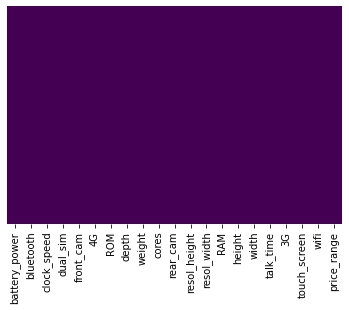

In [ ]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.shape

(2000, 21)

In [ ]:
# Identifying unique values in each column
for i in df:
  print(i,' '*(13-len(i)),'\t',df[i].nunique())

battery_power  	 1094
bluetooth      	 2
clock_speed    	 26
dual_sim       	 2
front_cam      	 20
4G             	 2
ROM            	 63
depth          	 10
weight         	 121
cores          	 8
rear_cam       	 21
resol_height   	 1137
resol_width    	 1109
RAM            	 1562
height         	 15
width          	 19
talk_time      	 19
3G             	 2
touch_screen   	 2
wifi           	 2
price_range    	 4


In [ ]:
# Identifying numerical and categorical features
dependent = 'price_range'
independent = list(set(df.columns) - {dependent})
categorical =[]
for i in independent:
  if df[i].nunique()<10:
    categorical.append(i)
numerical = list(set(df.columns) - set(categorical)- {dependent})

In [ ]:
print('Categorical=',categorical,'\n','Numerical=', numerical)

Categorical= ['touch_screen', 'bluetooth', '3G', 'wifi', '4G', 'dual_sim', 'cores'] 
 Numerical= ['width', 'talk_time', 'RAM', 'depth', 'battery_power', 'resol_width', 'rear_cam', 'ROM', 'weight', 'resol_height', 'front_cam', 'height', 'clock_speed']


In [ ]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,ROM,depth,weight,cores,rear_cam,resol_height,resol_width,RAM,height,width,talk_time,3G,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



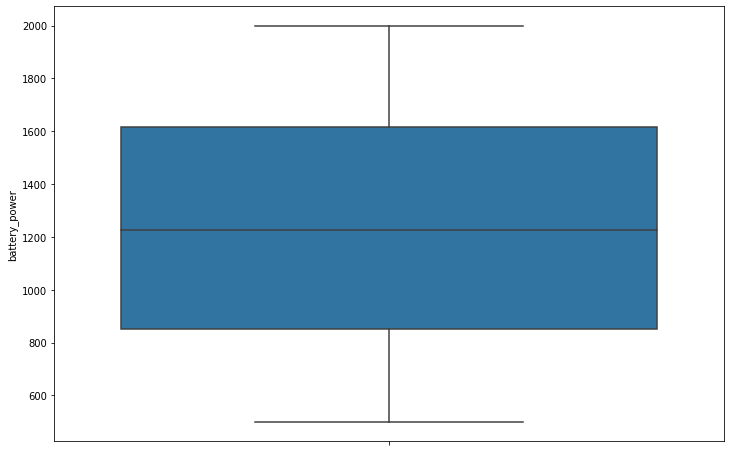

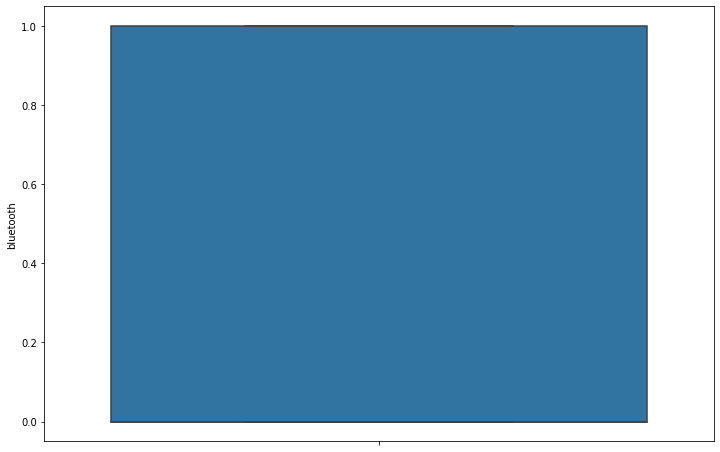

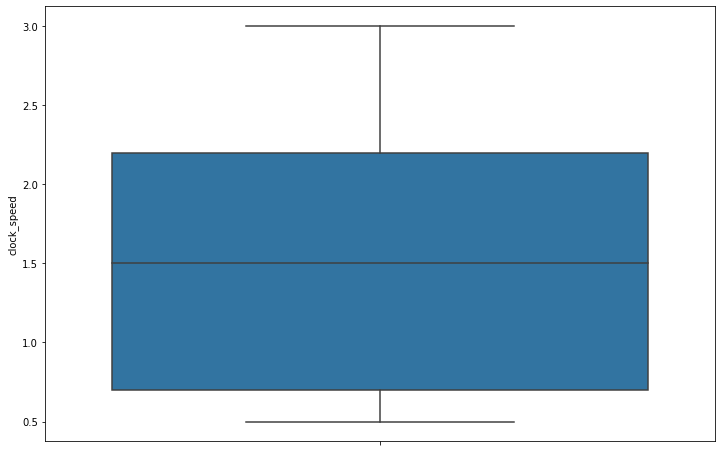

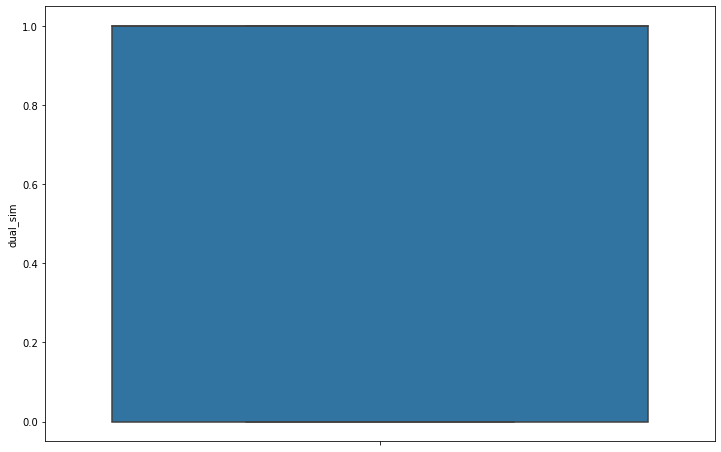

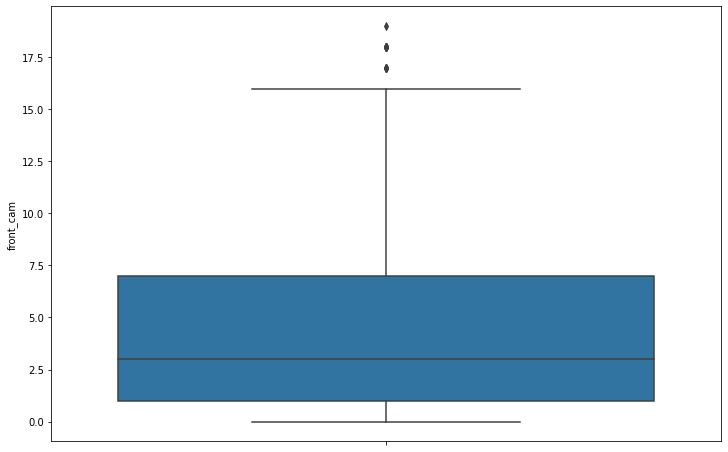

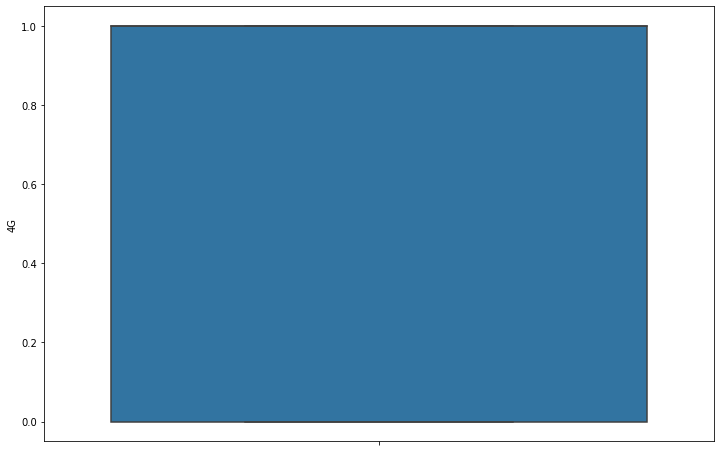

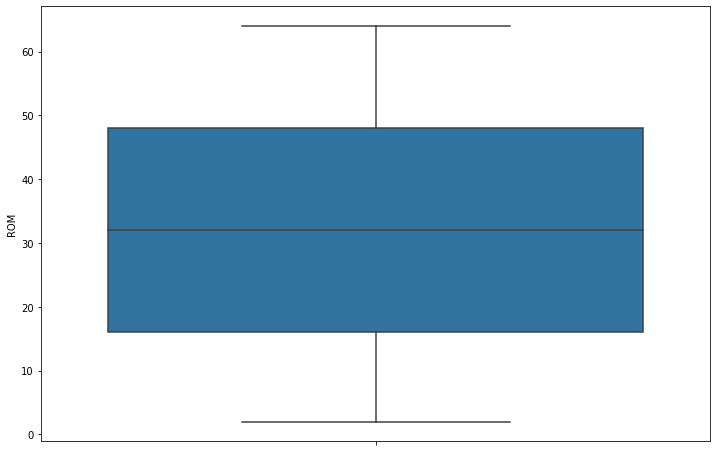

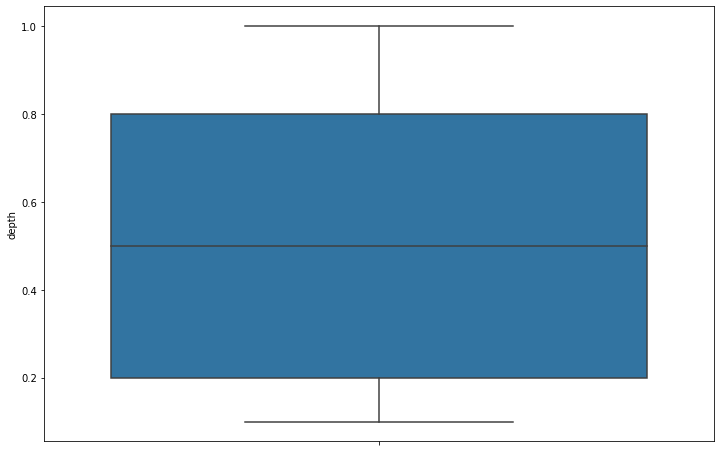

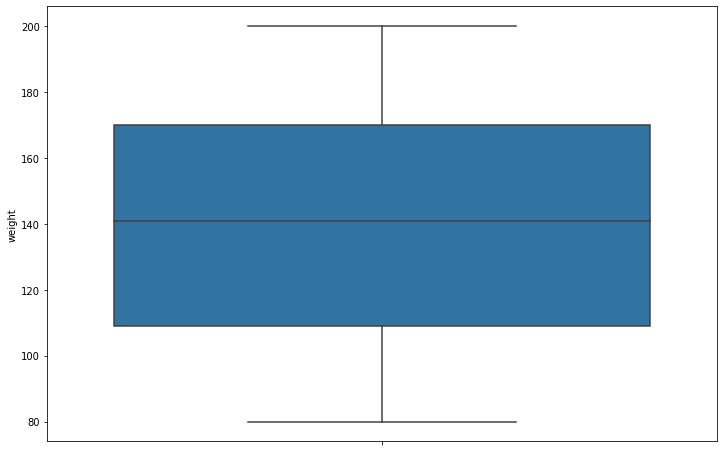

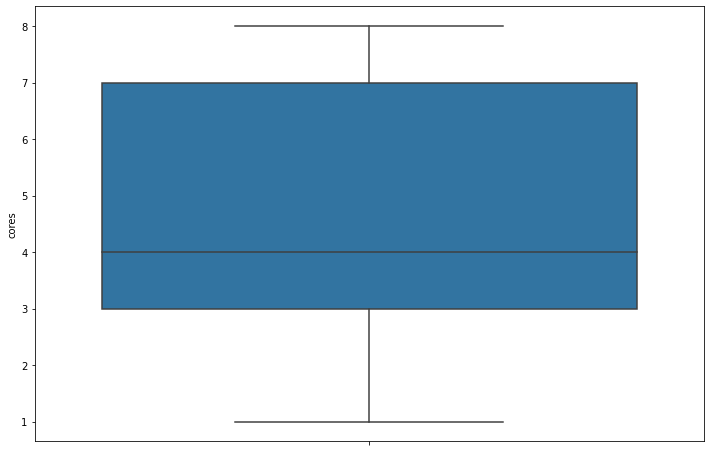

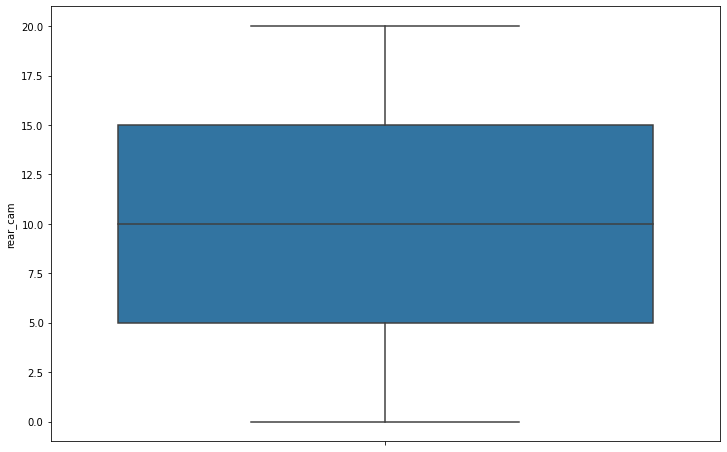

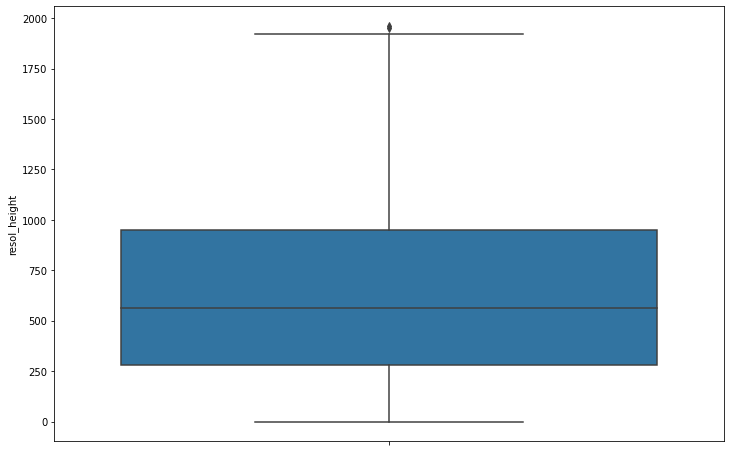

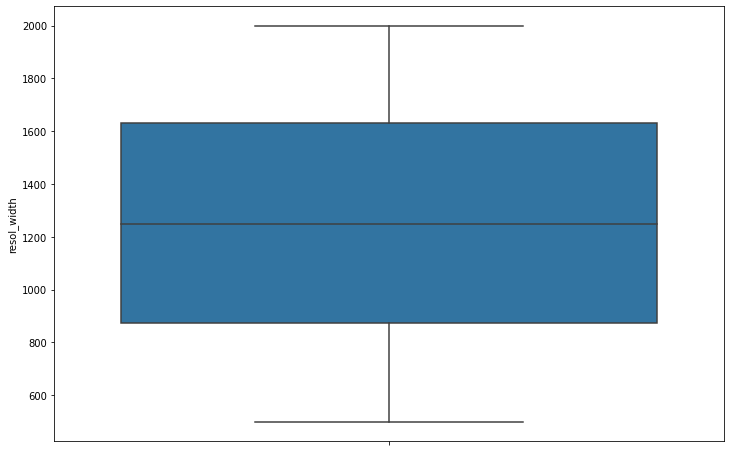

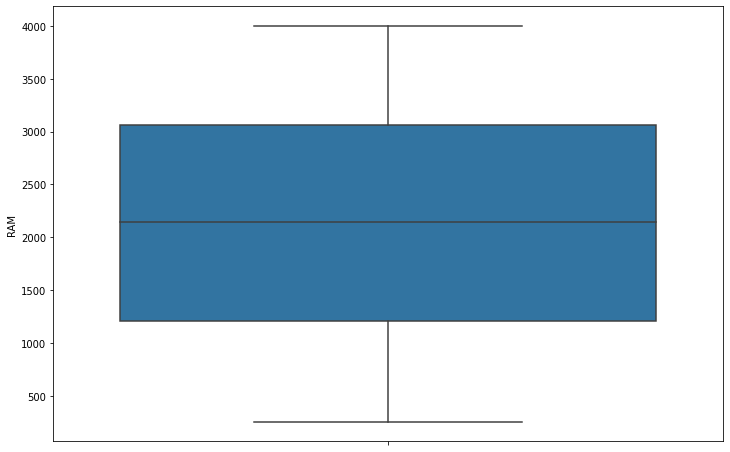

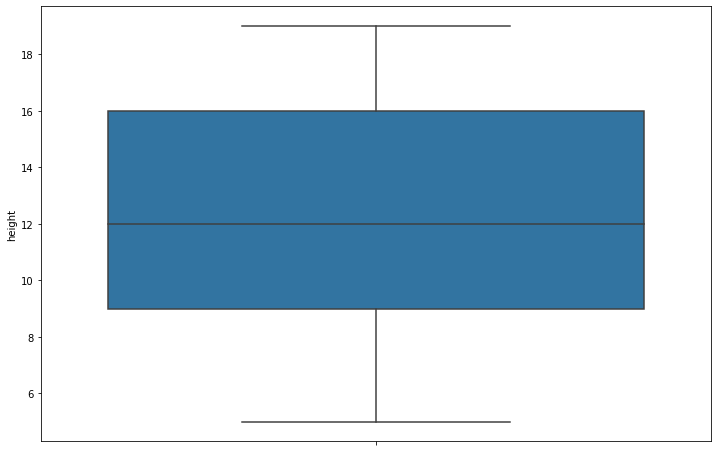

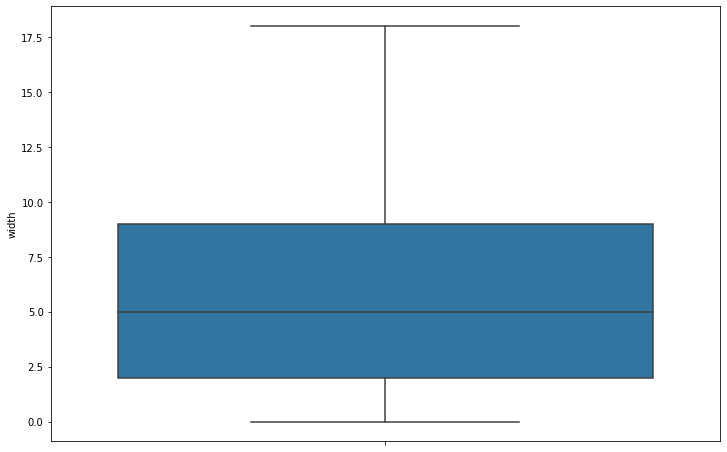

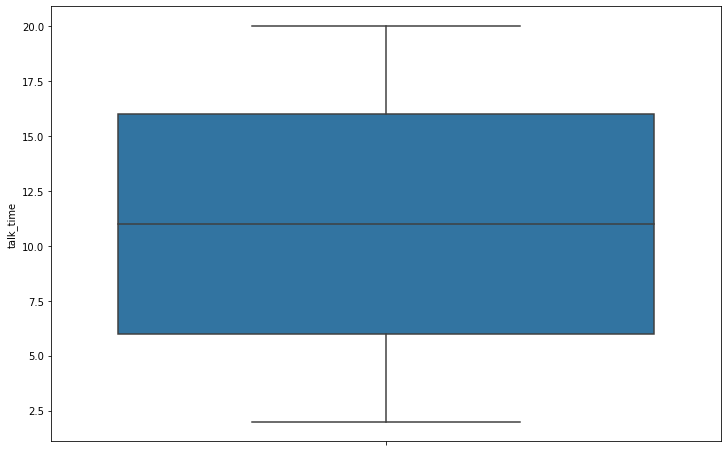

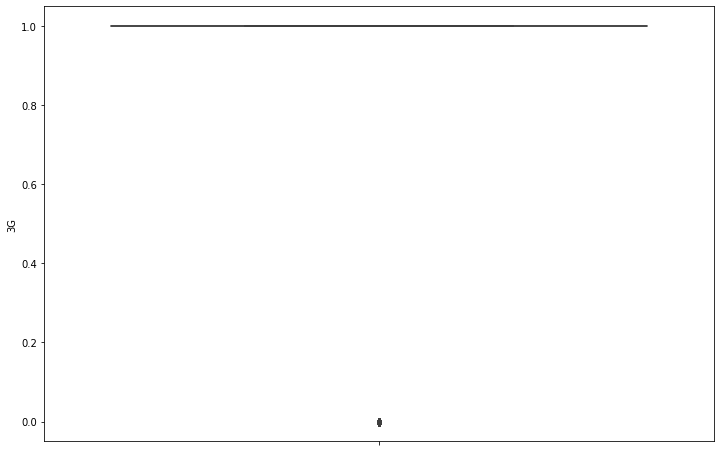

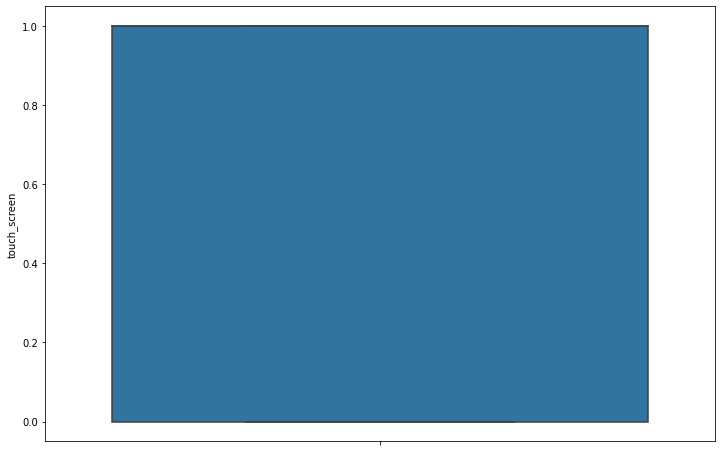

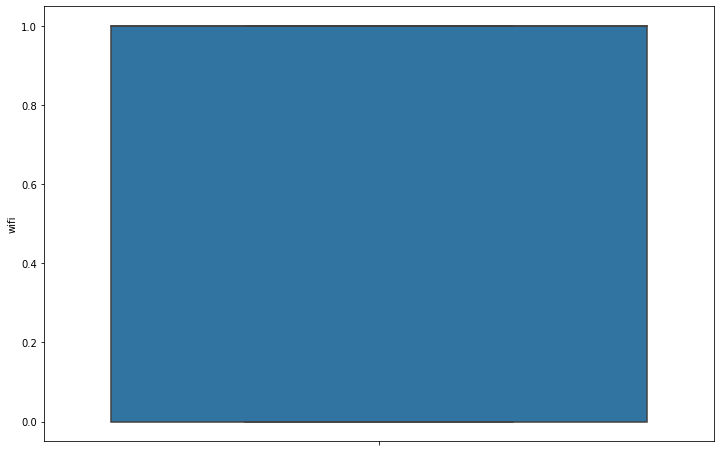

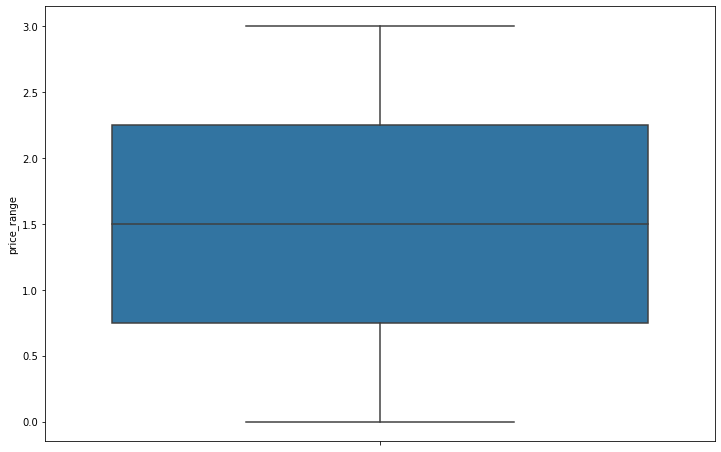

In [ ]:
#creating boxplot for outlier detection
for col in list_of_columns:
  plt.figure(figsize=(12,8))
  sns.boxplot(y=df[col])

In [ ]:
# Checking datset is balanced or imbalanced
vc=df['price_range']
fig = px.pie(vc, values=vc.value_counts().values, names=vc.value_counts().index, title='Mobile Price Range')
fig.update_traces(hoverinfo='label+percent', textinfo='value')
fig.show()

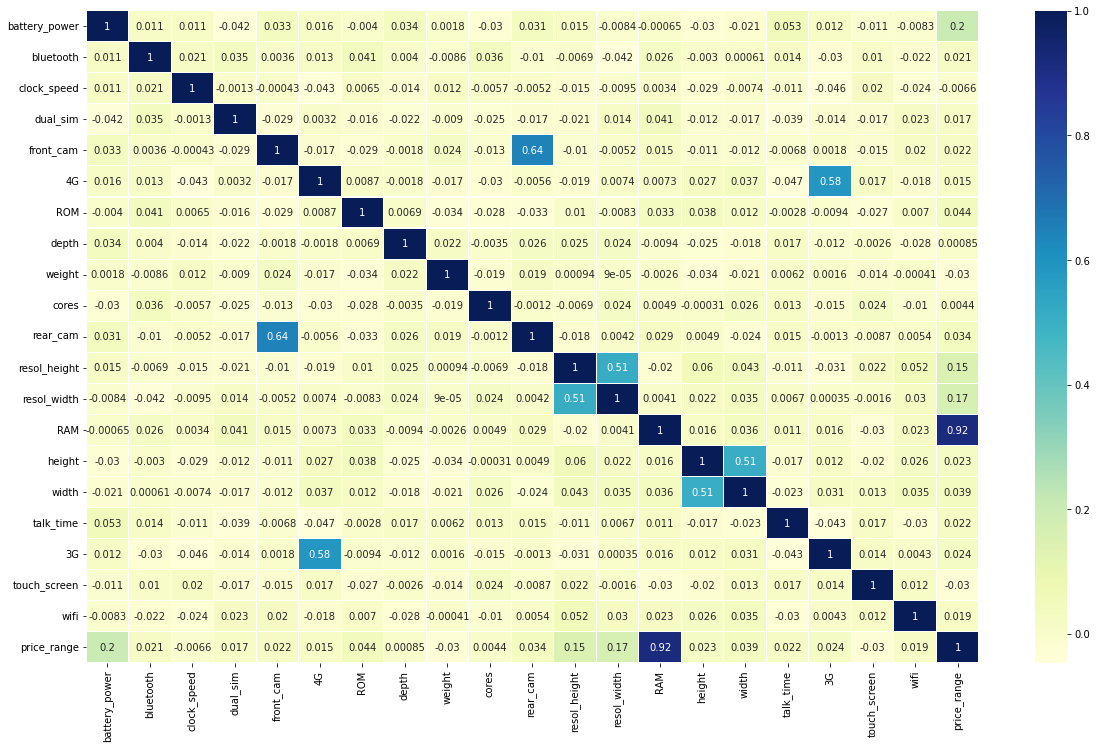

In [ ]:
# Heatmap of Correlation matrix for visual understanding
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
corr = df.corr()
correlation = corr.price_range
price_corr=correlation.sort_values(ascending=False)
price_corr

price_range      1.000000
RAM              0.917046
battery_power    0.200723
resol_width      0.165818
resol_height     0.148858
ROM              0.044435
width            0.038711
rear_cam         0.033599
3G               0.023611
height           0.022986
front_cam        0.021998
talk_time        0.021859
bluetooth        0.020573
wifi             0.018785
dual_sim         0.017444
4G               0.014772
cores            0.004399
depth            0.000853
clock_speed     -0.006606
weight          -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

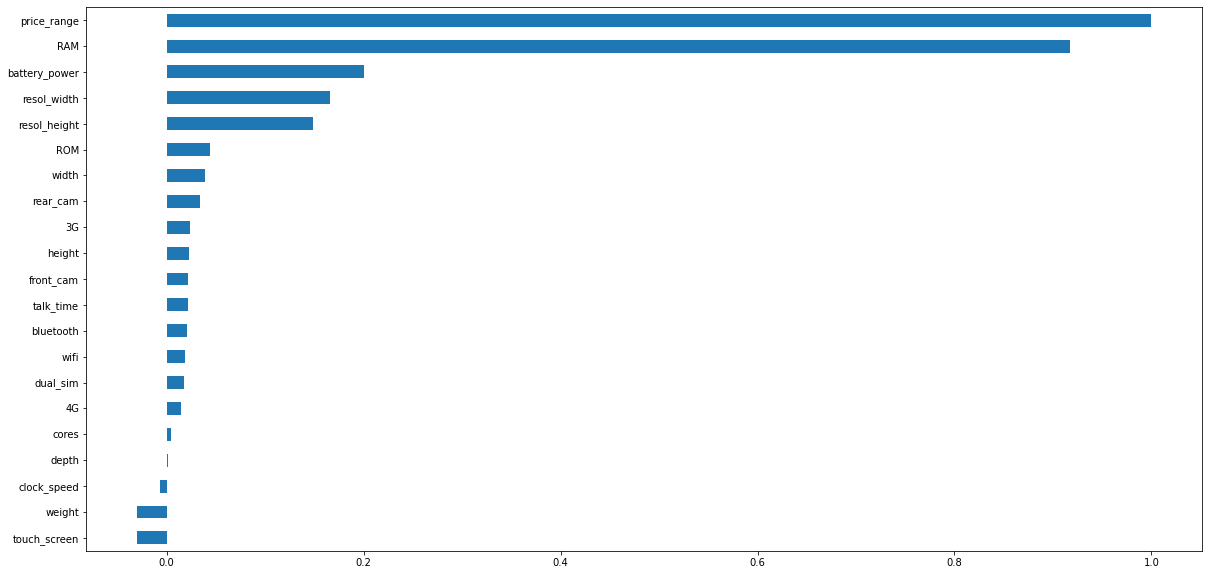

In [ ]:
plt.figure(figsize=(20,10))
price_corr.sort_values(ascending=True).plot(kind='barh')

In [ ]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = df.iloc[:,:20]
y = df.iloc[:,[-1]]

In [ ]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores.sort_values(by='Score',ascending=False).head(10)

,Specs,Score
13,RAM,931267.519053
11,resol_height,17363.569536
0,battery_power,14129.866576
12,resol_width,9810.586750
8,weight,95.972863
6,ROM,89.839124
15,width,16.480319
16,talk_time,13.236400
4,front_cam,10.135166
14,height,9.614878


In [ ]:
fig1 = px.scatter(df, y='RAM', x='price_range',color='price_range')
fig1.update_traces(marker_size=10)

In [ ]:
# # box plot to see relationship between dependent variable and independent variables
# plt.figure(figsize=(17,10))
# plt.subplot(2,2,1)
# #sns.jointplot(x='ram',y='price_range',data=df,color='red',kind='kde',shade=True)
# sns.boxplot(x="price_range", y="ram", data=df)

# plt.subplot(2,2,2)
# sns.boxplot(x="price_range", y="battery_power", data=df)

# plt.subplot(2,2,3)
# sns.boxplot(x="price_range", y="px_height", data=df)

# plt.subplot(2,2,4)
# sns.boxplot(x="price_range", y="mobile_wt", data=df)



# plt.subplots_adjust(wspace = 1 ,hspace =0.5 ,top = 0.5 , bottom = 0.1) 
# plt.tight_layout() 
# plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

trace0 = go.Box(x=df['price_range'], y=df['RAM'],name ='Price range Vs Ram')
trace1 = go.Box(x=df['price_range'], y=df['battery_power'],name ='Price range Vs Battery')
trace2 = go.Box(x=df['price_range'], y=df['resol_height'],name ='Price range Vs Px Height')
trace3 = go.Box(x=df['price_range'], y=df['resol_width'],name ='Price range Vs Px Width')
trace4 = go.Box(x=df['price_range'], y=df['weight'],name ='Price range Vs Mobile Weight')
trace5 = go.Box(x=df['price_range'], y=df['ROM'],name ='Price range Vs Int Memory')
trace6 = go.Box(x=df['price_range'], y=df['width'],name ='Price range Vs Screen width')
trace7 = go.Box(x=df['price_range'], y=df['talk_time'],name ='Price range Vs Talk Time')

fig = make_subplots(rows=2, cols=4)
# First subplot
fig.append_trace(trace0, row=1,col=1)
fig.append_trace(trace1, row=1,col=2)
fig.append_trace(trace2, row=1,col=3)
fig.append_trace(trace3, row=1,col=4)
fig.append_trace(trace4, row=2,col=1)
fig.append_trace(trace5, row=2,col=2)
fig.append_trace(trace6, row=2,col=3)
fig.append_trace(trace7, row=2,col=4)

fig.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[numerical])

,variables,VIF
0,width,3.712345
1,talk_time,4.806675
2,RAM,4.600413
3,depth,3.891728
4,battery_power,7.918615
5,resol_width,11.397164
6,rear_cam,6.204919
7,ROM,3.925612
8,weight,12.302239
9,resol_height,4.235918


In [ ]:
# Remove the weight column
df.drop(columns = 'weight', inplace = True)
numerical.remove('weight')

In [ ]:
calc_vif(df[numerical])

,variables,VIF
0,width,3.710880
1,talk_time,4.695626
2,RAM,4.508985
3,depth,3.809011
4,battery_power,7.528980
5,resol_width,10.922813
6,rear_cam,6.158228
7,ROM,3.884307
8,resol_height,4.235441
9,front_cam,3.405004


In [ ]:
#length variable which gives us the diagonal lenght of the mobile
df['length'] = np.round(np.sqrt(df['width']**2 + df['height']**2))
df.drop(columns = ['height','width'],inplace = True)
numerical.append('length')
numerical.remove('width')
numerical.remove('height')

In [ ]:
calc_vif(df[numerical])

,variables,VIF
0,talk_time,4.681088
1,RAM,4.510840
2,depth,3.803019
3,battery_power,7.493110
4,resol_width,10.901353
5,rear_cam,6.132233
6,ROM,3.861299
7,resol_height,4.235159
8,front_cam,3.403731
9,clock_speed,4.090130


In [ ]:
df['resol_length'] = np.round(np.sqrt(df['resol_width']**2 + df['resol_height']**2))
df.drop(columns = ['resol_height','resol_width'],inplace = True)
numerical.append('resol_length')
numerical.remove('resol_width')
numerical.remove('resol_height')

In [ ]:
calc_vif(df[numerical])

,variables,VIF
0,talk_time,4.661945
1,RAM,4.487983
2,depth,3.798847
3,battery_power,7.474832
4,rear_cam,6.111801
5,ROM,3.860655
6,front_cam,3.403242
7,clock_speed,4.075256
8,length,7.012949
9,resol_length,7.141096


Highest VIF got reduced to 7

In [ ]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,ROM,depth,cores,rear_cam,RAM,talk_time,3G,touch_screen,wifi,price_range,length,resol_length
0,842,0,2.2,0,1,0,7,0.6,2,2,2549,19,0,0,1,1,11.0,756.0
1,1021,1,0.5,1,0,1,53,0.7,3,6,2631,7,1,1,0,2,17.0,2184.0
2,563,1,0.5,1,2,1,41,0.9,5,6,2603,9,1,1,0,2,11.0,2131.0
3,615,1,2.5,0,0,0,10,0.8,6,9,2769,11,1,0,0,2,18.0,2161.0
4,1821,1,1.2,0,13,1,44,0.6,2,14,1411,15,1,1,0,1,8.0,1711.0


,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,ROM,depth,cores,rear_cam,RAM,talk_time,3G,touch_screen,wifi,price_range,length,resol_length
0,842,0,2.2,0,1,0,7,0.6,2,2,2549,19,0,0,1,1,11.0,756.0
1,1021,1,0.5,1,0,1,53,0.7,3,6,2631,7,1,1,0,2,17.0,2184.0
2,563,1,0.5,1,2,1,41,0.9,5,6,2603,9,1,1,0,2,11.0,2131.0
3,615,1,2.5,0,0,0,10,0.8,6,9,2769,11,1,0,0,2,18.0,2161.0
4,1821,1,1.2,0,13,1,44,0.6,2,14,1411,15,1,1,0,1,8.0,1711.0


# Make X and Y

In [ ]:
independent = list(set(df.columns) - {dependent})

In [ ]:
X = df[independent]
y = df[dependent]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Scaling features matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
X1 = std_sc.fit_transform(X=X)

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

X_train, X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2)

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:95.1875
Test Set Accuracy:93.75


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))


Confusion Matrix:
[[ 90  10   0   0]
 [  2  92   1   0]
 [  0   4  87   2]
 [  0   0   6 106]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(X_train, y_train)

In [ ]:
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [ ]:
print("Train Set Accuracy:"+str(accuracy_score(dt_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(dt_test_pred,y_test)*100))

Train Set Accuracy:100.0
Test Set Accuracy:84.75
